<a href="https://colab.research.google.com/github/niveshita/decision-tree/blob/main/Niveshita_khare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction using Decision Tree**

**Company Name**: Sparks Foundation

**Job Profile**:  Data Science & Business Analytics intern

**Objective**:  Create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier. It would be able to predict the class accordingly.

**Import Libraries** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline
import time
import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [ ]:
df = pd.read_csv('/content/Iris.csv')

**Data Analyzing**

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no missing datapoints. 

In [ ]:
df = df.drop(columns=['Id'],axis = 1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Data Visualization**

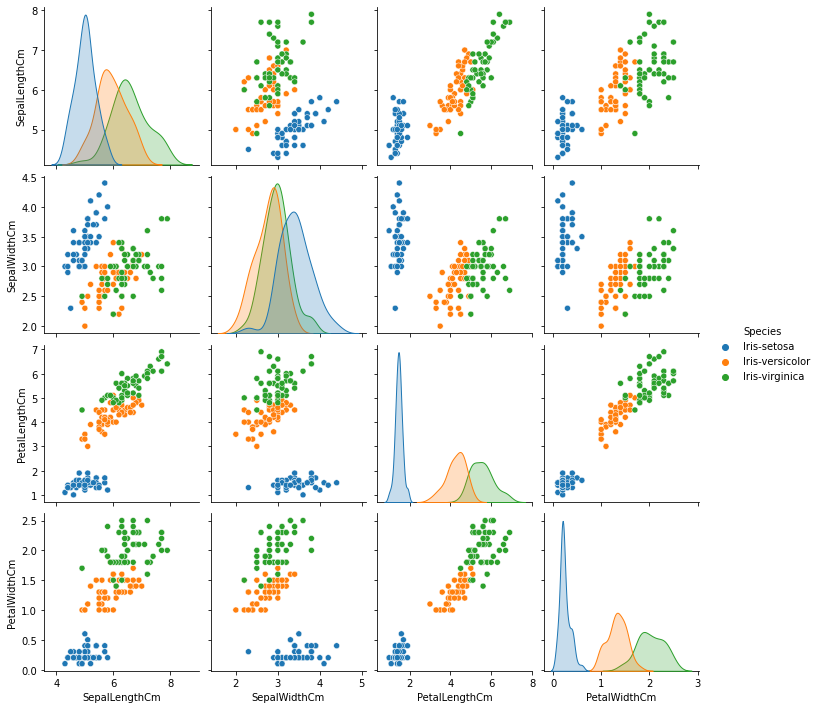

In [ ]:
sns.pairplot(df, hue='Species')

Separate the target value from the dataset

In [ ]:
X = df.drop('Species',axis =1)
y = df['Species']

**Splitting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1) 

**Classification Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dtree = DecisionTreeClassifier()


In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
X.shape

(150, 4)

In [ ]:
y.shape

(150,)

**Prediction and Evaluation**

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.92      0.92      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


**Comparing Actual vs Predicted**

In [ ]:
compare = pd.DataFrame({'Actual':y_test,'Predicted':predictions})

In [ ]:
compare.head(n=10)

,Actual,Predicted
14,Iris-setosa,Iris-setosa
98,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
16,Iris-setosa,Iris-setosa
131,Iris-virginica,Iris-virginica
56,Iris-versicolor,Iris-versicolor
141,Iris-virginica,Iris-virginica
44,Iris-setosa,Iris-setosa
29,Iris-setosa,Iris-setosa
120,Iris-virginica,Iris-virginica


**Visualize the Decision Tree**

In [ ]:
from sklearn.tree import plot_tree

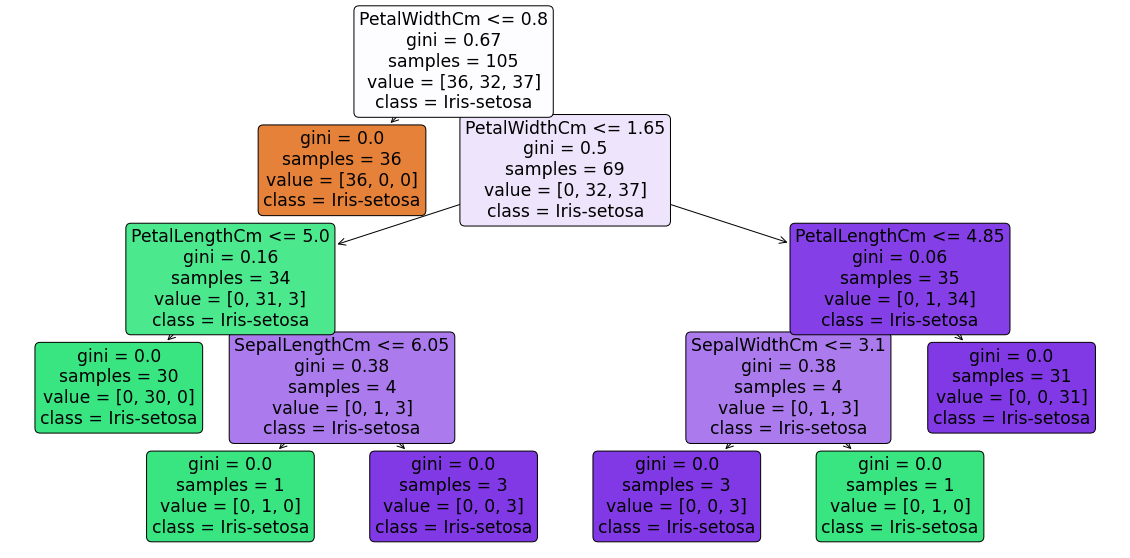

In [ ]:
plt.figure(figsize=(20,10))
tree = plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=y.values)